In [1]:
import numpy as np
from numpy.fft import rfft,irfft, rfftfreq
import scipy
import scipy.interpolate as scint
import vlsr
import vlsr_iraf
from xkeckhelio import x_keckhelio
import fitsio
dir='/astro/u/anze/bmxdata/reduced/pas/191009_2100'
import matplotlib.pyplot as plt
import bmxhi4
from matplotlib.colors import LogNorm
import bmxdata
from astropy.visualization import simple_norm

In [65]:
freq=fitsio.read(dir+'/cut0/freq.fits')
data={}
for pol in [0,1]:
    for i in range(4):
        for j in range(i,4):
            ai=i+pol*4
            aj=j+pol*4
            fname='auto_%i'%(ai+1) if ai==aj else 'cross_%i%i'%(ai+1,aj+1)
            print(fname)
            da=fitsio.read(dir+'/cut0/'+fname+'.fits')
            ofs=2100*32+1000
            da=da[ofs:ofs+3000]
            data[(ai,aj)]=da
    




auto_1
cross_12
cross_13
cross_14
auto_2
cross_23
cross_24
auto_3
cross_34
auto_4
auto_5
cross_56
cross_57
cross_58
auto_6
cross_67
cross_68
auto_7
cross_78
auto_8


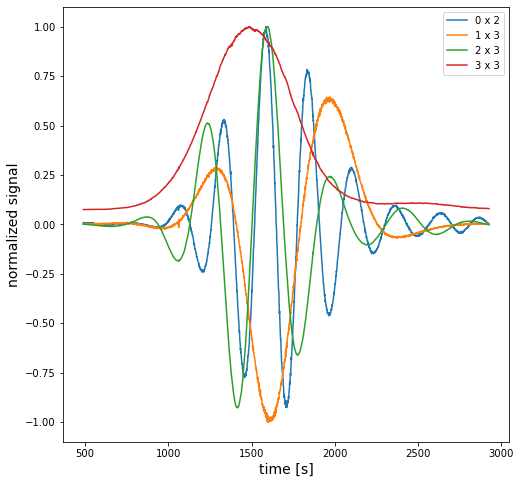

In [106]:
plt.figure(figsize=(8,8))
for i,j,pol in [(0,2,0),(1,3,1),(2,3,0),(3,3,0)]:
            lab='%i x %i'%(i,j)# Pol %i'%(i,j,pol)
            y=data[(i+4*pol,j+4*pol)][:,297]
            y/=abs(y).max()
            imin,imax=500,3000
            
            plt.plot(np.arange(imin,imax)*0.976,y[imin:imax],label=lab)
plt.xlabel('time [s]',fontsize=14)
plt.ylabel('normalized signal',fontsize=14)
plt.legend()        
plt.savefig('bmxfringe.pdf')


In [99]:
freq[297]

1179.8950434476137

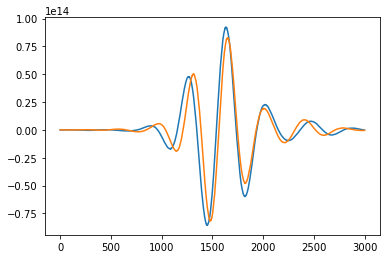

In [50]:
plt.plot(da[1000:4000,290])
plt.plot(da[1000:4000,700])


In [28]:
freq=fitsio.read(dir+'/cut0/freq.fits')
da=fitsio.read(dir+'/cut0/auto_3.fits')
da=da[:da.shape[0]//32*32,:]
da=da.reshape(-1,32,da.shape[1]).mean(axis=1)

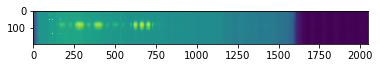

In [32]:
plt.imshow(da[2100:2300,:],norm=LogNorm())